**Objetivo**: Construir um modelo de machine learning para prever se um passageiro do Titanic sobreviveu ou não com base em características como idade, classe, sexo, etc.

1.Definição do Problema:
Contexto: O Titanic naufragou em 1912, e queremos prever a sobrevivência dos passageiros.

Tipo de Problema: Classificação binária (Sobreviveu = 1, Não Sobreviveu = 0).

Métrica Principal: Acurácia, Precisão, Recall e F1-Score.

2.Coleta de Dados
Fonte: Utilize o dataset Titanic no Kaggle.

Arquivos:

train.csv: Dados de treino com a coluna Survived.

test.csv: Dados de teste sem a coluna Survived.

3. Pré-processamento e Análise Exploratória (EDA)
Ferramentas: Python (Pandas, Matplotlib, Seaborn).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados de treino e teste
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Visualizar as primeiras linhas do dataframe de treino
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


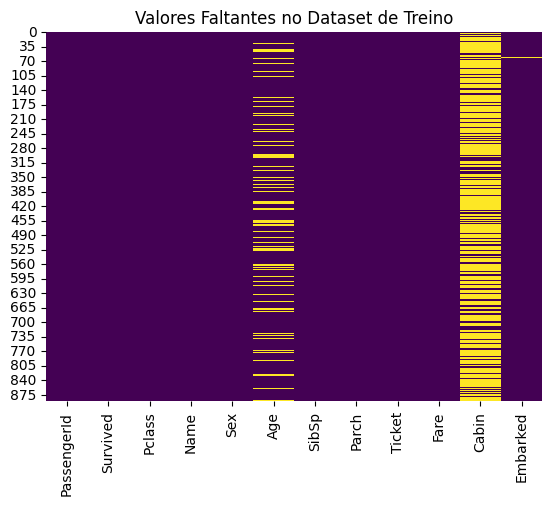

<ipython-input-9-64b39518103d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-9-64b39518103d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
# Verificar valores nulos no dataset de treino
print(train.isnull().sum())

# Heatmap de valores faltantes
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes no Dataset de Treino')
plt.show()


# Preencher idade faltante com a mediana
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Preencher "Embarked" faltante com o valor mais comum (moda)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Remover coluna "Cabin" (muitos valores faltantes)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

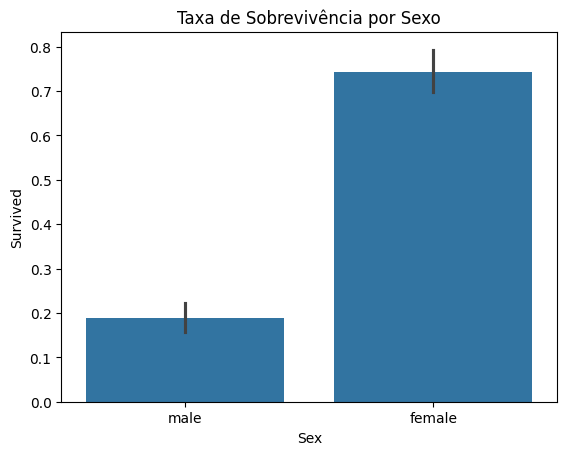

In [ ]:
#Visualizações
#Sobrevivência por Sexo
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

**Insight: Mulheres tiveram uma taxa de sobrevivência muito maior (~74%) que homens (~18%)**

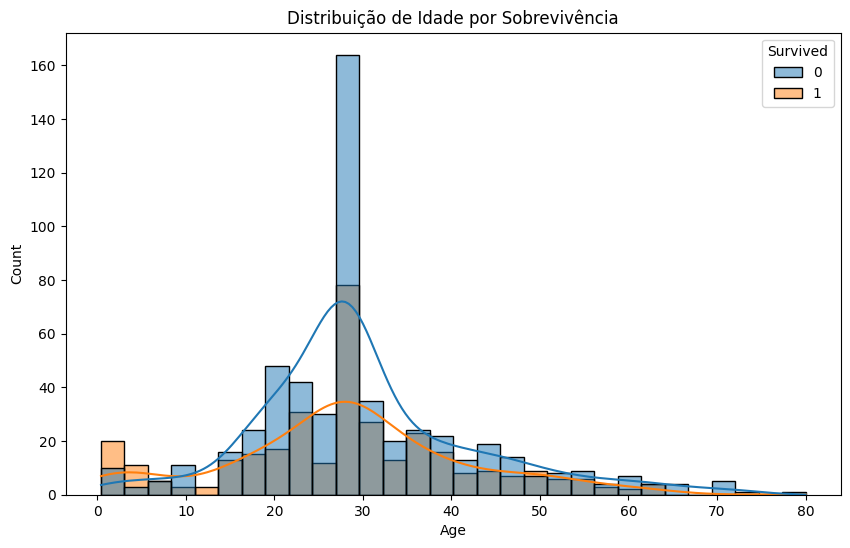

In [ ]:
# Distribuição de Idade por Sobrevivência:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

**Insight: Crianças (especialmente < 10 anos) tiveram maior taxa de sobrevivência.**

**Passo 4: Engenharia de Features**

In [ ]:
# Converter "Sex" para 0 (masculino) e 1 (feminino)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Criar dummy variables para "Embarked"
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

In [ ]:
#Criar Novas Features

# Criar "FamilySize" (tamanho da família)
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

# Criar "IsAlone" (1 se estiver sozinho, 0 caso contrário)
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)
test['IsAlone'] = (test['FamilySize'] == 0).astype(int)

# Binning de "Age" (dividir em faixas etárias)
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso'])
test['AgeGroup'] = pd.cut(test['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso'])

In [ ]:
#Remover Colunas Irrelevantes
# Colunas a serem removidas
drop_columns = ['Name', 'Ticket', 'AgeGroup', 'SibSp', 'Parch']

train_clean = train.drop(drop_columns, axis=1)
test_clean = test.drop(drop_columns, axis=1)

print(train_clean.head())

   PassengerId  Survived  Pclass  Sex   Age     Fare  Embarked_C  Embarked_Q  \
0            1         0       3    0  22.0   7.2500       False       False   
1            2         1       1    1  38.0  71.2833        True       False   
2            3         1       3    1  26.0   7.9250       False       False   
3            4         1       1    1  35.0  53.1000       False       False   
4            5         0       3    0  35.0   8.0500       False       False   

   Embarked_S  FamilySize  IsAlone  
0        True           1        0  
1       False           1        0  
2        True           0        1  
3        True           1        0  
4        True           0        1  


**Passo 5: Modelagem**

In [ ]:
# Separar features (X) e target (y)
X = train_clean.drop(['PassengerId', 'Survived'], axis=1)  # Remover colunas não usadas
y = train_clean['Survived']

# Dividir em treino (80%) e validação (20%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinar modelo
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Prever e avaliar
y_pred_lr = lr.predict(X_val)
print("Acurácia (Regressão Logística):", accuracy_score(y_val, y_pred_lr))

Acurácia (Regressão Logística): 0.7988826815642458


In [ ]:
#Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_val)
print("Acurácia (Árvore de Decisão):", accuracy_score(y_val, y_pred_dt))

Acurácia (Árvore de Decisão): 0.770949720670391


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
print("Acurácia (Random Forest):", accuracy_score(y_val, y_pred_rf))

Acurácia (Random Forest): 0.8212290502793296


In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)
print("Acurácia (XGBoost):", accuracy_score(y_val, y_pred_xgb))

Acurácia (XGBoost): 0.7821229050279329


In [ ]:
#Avaliando o Desempenho do Melhor Modelo
from sklearn.metrics import classification_report, confusion_matrix

print("Relatório de Classificação:\n", classification_report(y_val, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_val, y_pred_rf))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Matriz de Confusão:
 [[88 17]
 [15 59]]


In [ ]:
#Otimização de Hiperparâmetros9Grid Search)
#Melhorando o Random Forest
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

# Buscar a melhor combinação
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Melhores parâmetros
print("Melhores Parâmetros:", grid.best_params_)
print("Melhor Acurácia:", grid.best_score_)

# Treinar modelo final com os melhores parâmetros
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

Melhores Parâmetros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Melhor Acurácia: 0.8300009849305624


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
#Treinar Modelo Final
# Treinar com todos os dados de treino
best_rf.fit(X, y)

# Preparar dados de teste (já pré-processados)
X_test = test_clean.drop('PassengerId', axis=1)

# Fazer previsões
test_predictions = best_rf.predict(X_test)

# Criar arquivo de submissão para o Kaggle
submission = pd.DataFrame({
    'PassengerId': test_clean['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('titanic_submission.csv', index=False)

In [28]:
import joblib
joblib.dump(best_rf, 'titanic_model.pkl')  # Substitua "best_rf" pelo seu modelo

['titanic_model.pkl']